In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cmasher as cmr 

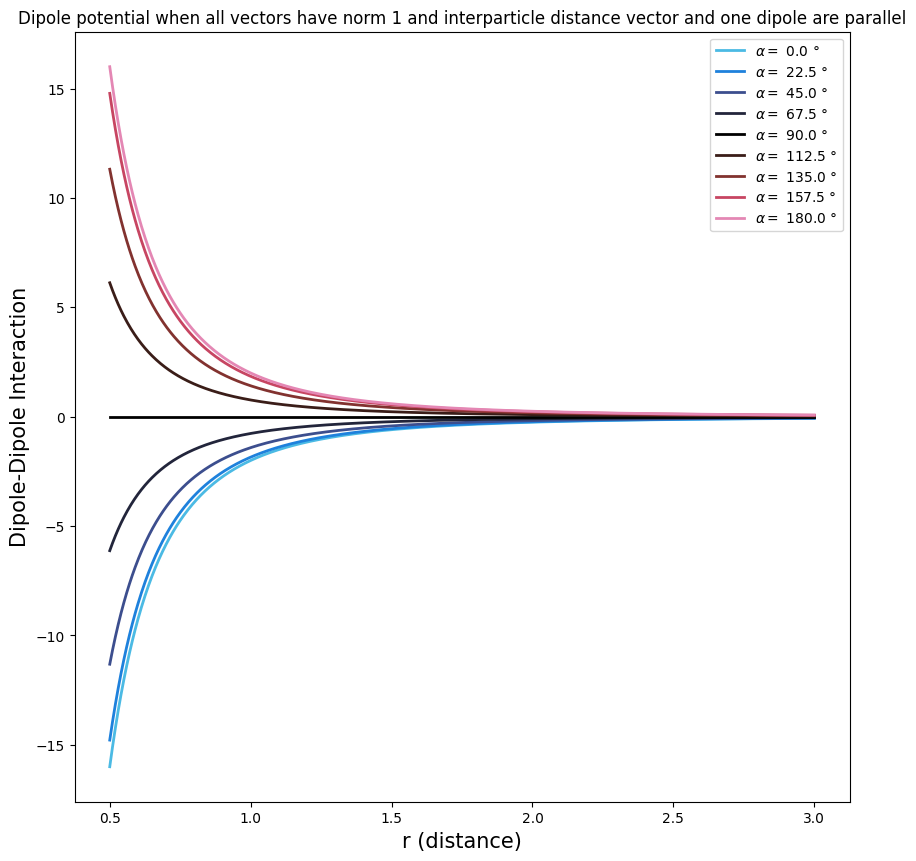

In [2]:

sns.set_palette('cmr.redshift',9)
# potential simplified as we assume that p1 and r are parallel 
def dipole_potential_parallel(R,alpha):
    norm_p1 = 1
    norm_p2 = 1 
    U = -1/np.power(R,3)*2*np.cos(alpha)
    return U

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U

# and  m1,m2 in 0,pi 
R=np.linspace(0.5,3,1000)
fig,ax = plt.subplots(figsize=(10,10))
for alpha in np.linspace(0,np.pi,9):
    beta=0
    U = dipole_potential_general(R,alpha,beta)
    ax.plot(R,U,
            lw=2,
            label="$\\alpha = $ {} $\degree$".format(np.round(alpha*180/np.pi,1)))

plt.ylabel("Dipole-Dipole Interaction",size=15)
plt.xlabel("r (distance)",size=15)
plt.title("Dipole potential when all vectors have norm 1 and interparticle distance vector and one dipole are parallel")
plt.legend()
plt.show()

    

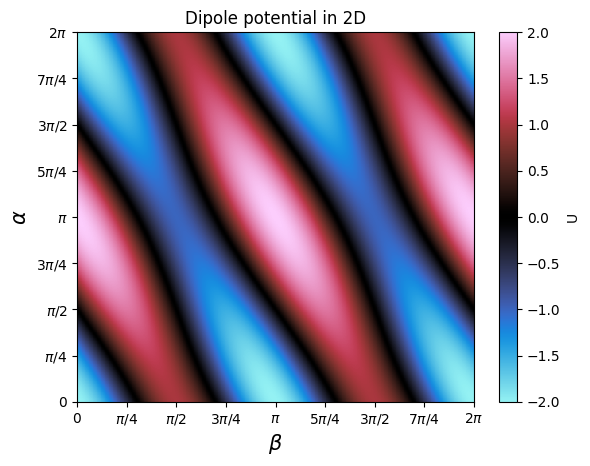

In [4]:
# alpha: angle between p1 and p2 
# beta: angle between p1 and r 
# gamma: in 2D given by alpha+beta  

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U


R=1
U=np.zeros((500,500))
Alpha = np.linspace(0,2*np.pi,500)
Beta = np.linspace(0,2*np.pi,500)


for i, alpha in enumerate(Alpha):
    for j, beta in enumerate(Beta):
        U[i,j] = dipole_potential_general(R,alpha,beta)


U_min, U_max = -2,2

fig, ax = plt.subplots()

c = ax.pcolormesh(Alpha, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
ax.set_title('Dipole potential in 2D as function of angles alpha (p1,p2) and beta (p1,r)')
# set the limits of the plot to the limits of the data
ax.axis([Alpha.min(), Alpha.max(), Beta.min(), Beta.max()])
ax.set_xlabel("$\\beta$",size=15)
ax.set_ylabel("$\\alpha$",size=15)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
ax.set_yticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.colorbar(c, ax=ax, label="U")



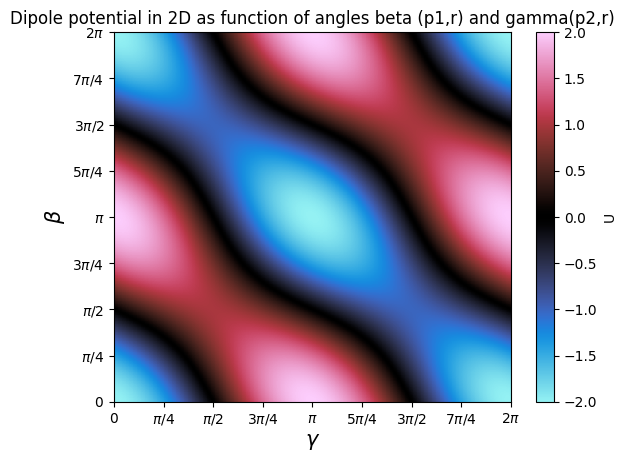

In [17]:
# beta: angle between p1 and r 
# gamma: angle between p2 and r 
# alpha: angle between p1 and p2, given by gamma-beta
def dipole_potential_general(R,beta,gamma):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(gamma-beta) - 3*np.cos(beta)*np.cos(gamma))
    return U


R=1
U=np.zeros((500,500))

Beta = np.linspace(0,2*np.pi,500)
Gamma = np.linspace(0,2*np.pi,500)

for i, beta in enumerate(Beta):
    for j, gamma in enumerate(Gamma):
        U[i,j] = dipole_potential_general(R,beta,gamma)


U_min, U_max = -2,2

fig, ax = plt.subplots()

c = ax.pcolormesh(Gamma, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
ax.set_title('Dipole potential in 2D as function of angles beta (p1,r) and gamma(p2,r)')
# set the limits of the plot to the limits of the data
ax.axis([Gamma.min(), Gamma.max(), Beta.min(), Beta.max()])
ax.set_xlabel("$\\gamma$",size=15)
ax.set_ylabel("$\\beta$",size=15)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
ax.set_yticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.colorbar(c, ax=ax, label="U")


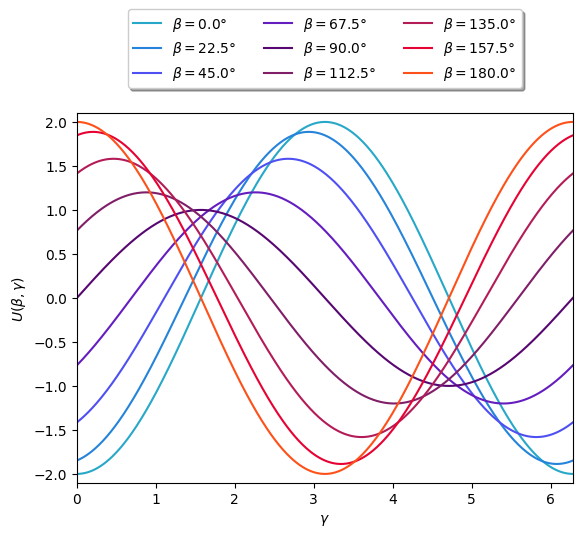

In [40]:
R=1
def dipole_potential_general(R,beta,gamma):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(gamma-beta) - 3*np.cos(beta)*np.cos(gamma))
    return U

U=np.zeros(500)
sns.set_palette('cmr.guppy_r',9)
Gamma = np.linspace(0,2*np.pi,500)
fig,ax=plt.subplots()
ax.set_xlim([0,2*np.pi])
ax.set_ylim([-2.1,2.1])
ax.set_xlabel("$\\gamma$")
ax.set_ylabel("$U(\\beta,\\gamma)$")
for beta in np.linspace(0.0,np.pi,9):
    for i, gamma in enumerate(Gamma):
        U[i] = dipole_potential_general(R,beta,gamma)


    plt.plot(Gamma,U,label="$\\beta =${}$\degree$".format(beta*360/(2*np.pi)))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.show()


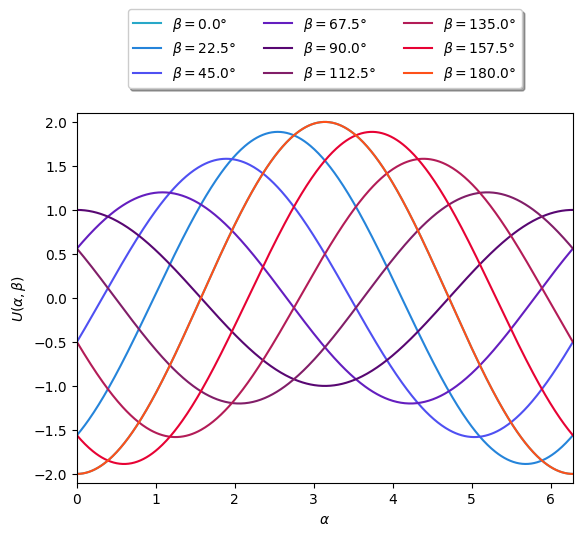

In [41]:

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U


R=1
U=np.zeros(500)
sns.set_palette('cmr.guppy_r',9)
Alpha = np.linspace(0,2*np.pi,500)
fig,ax=plt.subplots()
ax.set_xlim([0,2*np.pi])
ax.set_ylim([-2.1,2.1])
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$U(\\alpha,\\beta)$")
for beta in np.linspace(0.0,np.pi,9):
    for i, alpha in enumerate(Alpha):
        U[i] = dipole_potential_general(R,alpha,beta)


    plt.plot(Alpha,U,label="$\\beta =${}$\degree$".format(beta*360/(2*np.pi)))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.show()


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.ticker as ticker

def plot(beta,gamma):
    thetas = np.arange(-np.pi, np.pi, .05)
    coordinates = np.vstack((np.cos(thetas),np.sin(thetas)))
    fig, ax = plt.subplots() 
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())    

    plt.xlim(-1.1,3.1)
    plt.ylim(-1.1,1.1)
    shiftx=2.0 
    shifty=0
    ax.set_aspect('equal')
    plt.scatter(coordinates[0,:],coordinates[1,:]+shifty,s=0.5, c='k')
    
    plt.scatter(coordinates[0,:]+shiftx, coordinates[1,:]+shifty,s=0.5, c='k')
    plt.arrow(0, shifty, np.cos(beta), np.sin(beta), head_width=0.15, color='r', length_includes_head=True)
    plt.arrow(shiftx, shifty, np.cos(gamma), np.sin(gamma), head_width=0.15, color='r', length_includes_head=True)

   

interact(plot, 
         beta = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1), 
         gamma = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1),)



interactive(children=(FloatSlider(value=0.0, description='beta', max=6.283185307179586), FloatSlider(value=0.0…

<function __main__.plot(beta, gamma)>